In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
#%matplotlib qt

In [2]:
df = pd.read_csv('data/covidworld.csv')
df = df.drop('SNo', axis=1)

In [3]:
def get_country(country_name):
    data = df[df['Country/Region']==country_name]
    data = data[data['Confirmed']>=100]
    country = data.groupby('ObservationDate')
    country = country.sum()
    return country

11


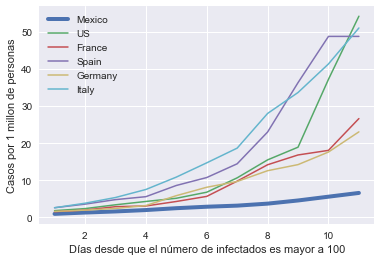

In [4]:
mexico = get_country('Mexico')['Confirmed']/129.2e6*1e6
days = mexico.size
print(days)
plt.plot(np.arange(1, days+1), mexico, linewidth=4, label='Mexico')

countries = ['US','France', 'Spain', 'Germany', 'Italy']
population = [327.2e6, 66.99e6, 46.66e6, 82.79e6, 60.48e6]
for i in range(0,len(countries)):
    country = get_country(countries[i])['Confirmed']/population[i]*1e6
    plt.plot(np.arange(1, days+1), country[:days], linewidth=1.5, label=countries[i]) 

plt.ylabel('Casos por 1 millon de personas')
plt.xlabel('Días desde que el número de infectados es mayor a 100')
plt.legend()
plt.savefig('images/comparision.png', dpi=400)
plt.show()